Data 620

HW: 3
Student Name: Hantz Angrand

Professor: Alain Ledon

Assignment:

1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges.  2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing. You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.  3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.  4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your homework submission.

Project:
Graph the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman.



Importing the libraries

In [246]:
import urllib.request as urllib
import io
import zipfile

In [247]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
from IPython.display import Image


url to download the football data

In [273]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

Zipfile object

In [274]:
zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

In [275]:
print(txt)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)



Information about the graph

In [277]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :", str(nx.number_connected_components(G)))

Number of nodes : 115
Number of edges : 613
Number of connected components : 1


Take a random sample of edges and  Remove some edge

In [278]:
node_subset = random.sample(G.nodes(), int(0.25 * G.number_of_nodes()))
# Remove some edge
H = G.copy()
H.remove_nodes_from(node_subset)

In [279]:
node_subset_size = len(list(node_subset))
print("Deleted : ", str(node_subset_size))
print("Remaining : ", str((m - node_subset_size)))

Deleted :  28
Remaining :  585


The attribute .degree() returns the list of the number of degrees (neighbors) for each node of the graph 

In [290]:
print("Bipartite Network G\n  Bipartite: {}\n  Connected: {}".format(nx.is_bipartite(H), 
                                                                 nx.is_connected(H)))

Bipartite Network G
  Bipartite: False
  Connected: True


In [280]:
H.degree()

DegreeView({'BrighamYoung': 9, 'FloridaState': 7, 'Iowa': 10, 'KansasState': 7, 'TexasTech': 7, 'PennState': 12, 'SouthernCalifornia': 11, 'ArizonaState': 9, 'SanDiegoState': 9, 'Baylor': 5, 'NorthTexas': 8, 'NorthernIllinois': 9, 'Northwestern': 10, 'WesternMichigan': 7, 'Wyoming': 7, 'Auburn': 10, 'Akron': 10, 'VirginiaTech': 7, 'Alabama': 8, 'Arizona': 10, 'Utah': 9, 'ArkansasState': 5, 'WestVirginia': 8, 'BowlingGreenState': 9, 'Michigan': 9, 'Buffalo': 9, 'Syracuse': 7, 'CentralFlorida': 7, 'CentralMichigan': 8, 'Purdue': 9, 'Colorado': 6, 'Connecticut': 5, 'EasternMichigan': 8, 'EastCarolina': 7, 'Duke': 8, 'FresnoState': 8, 'OhioState': 10, 'Houston': 7, 'Rice': 8, 'Idaho': 7, 'Washington': 9, 'Kansas': 6, 'SouthernMethodist': 9, 'Pittsburgh': 7, 'Kentucky': 8, 'Louisville': 6, 'LouisianaTech': 9, 'LouisianaMonroe': 7, 'Minnesota': 10, 'MiamiOhio': 8, 'Vanderbilt': 9, 'MiddleTennesseeState': 7, 'Illinois': 11, 'MississippiState': 8, 'Oregon': 8, 'Ohio': 9, 'IowaState': 7, 'SanJo

Compute the number of edges, but also metrics on the degree sequence :

In [281]:
nb_nodes = len(H.nodes())
nb_arr = len(H.edges())


In [282]:
print("Number of nodes : " + str(nb_nodes))
print("Number of edges : " + str(nb_arr))


Number of nodes : 87
Number of edges : 351


The diameter is the maximum eccentricity and The eccentricity of a node v is the maximum distance from v to all other nodes in H.


In [283]:
n_diam = nx.diameter(H)
print("the diameter is : " + str(n_diam))

the diameter is : 5


In [284]:
n_ecc = nx.eccentricity(H, 'Connecticut')
print("The eccentricity of 'Connecticut' for example is : " + str(n_ecc))

The eccentricity of 'Connecticut' for example is : 4


In [285]:
#Other measure of the graph
n_cent = nx.center(H)
print("The center is the set of nodes with eccentricity equal to radius: " + str(n_cent))
print("-------------------------------")
n_rad = nx.radius(H)
print("The radius that is the minimum eccentricity : " + str(n_rad))


The center is the set of nodes with eccentricity equal to radius: ['BrighamYoung', 'Northwestern', 'LouisianaTech', 'Minnesota', 'MiddleTennesseeState', 'Illinois']
-------------------------------
The radius that is the minimum eccentricity : 3


List of the minimal path between each node of the graph

In [286]:

# Returns shortest path length between each node
list(nx.all_pairs_shortest_path_length(H))

[('BrighamYoung',
  {'BrighamYoung': 0,
   'FloridaState': 1,
   'SanDiegoState': 1,
   'Wyoming': 1,
   'Utah': 1,
   'Syracuse': 1,
   'MississippiState': 1,
   'UtahState': 1,
   'AirForce': 1,
   'NevadaLasVegas': 1,
   'Duke': 2,
   'Louisville': 2,
   'NorthCarolina': 2,
   'Clemson': 2,
   'WakeForest': 2,
   'Maryland': 2,
   'ArizonaState': 2,
   'Arizona': 2,
   'Illinois': 2,
   'OregonState': 2,
   'Auburn': 2,
   'CentralMichigan': 2,
   'WashingtonState': 2,
   'California': 2,
   'VirginiaTech': 2,
   'WestVirginia': 2,
   'Buffalo': 2,
   'EastCarolina': 2,
   'Pittsburgh': 2,
   'Rutgers': 2,
   'Alabama': 2,
   'Kentucky': 2,
   'MiddleTennesseeState': 2,
   'Mississippi': 2,
   'LouisianaState': 2,
   'Arkansas': 2,
   'TexasTech': 2,
   'NorthTexas': 2,
   'ArkansasState': 2,
   'Idaho': 2,
   'Navy': 2,
   'NotreDame': 2,
   'IowaState': 2,
   'Hawaii': 2,
   'Northwestern': 3,
   'Vanderbilt': 3,
   'Connecticut': 3,
   'Houston': 3,
   'Tulane': 3,
   'Tulsa': 3,

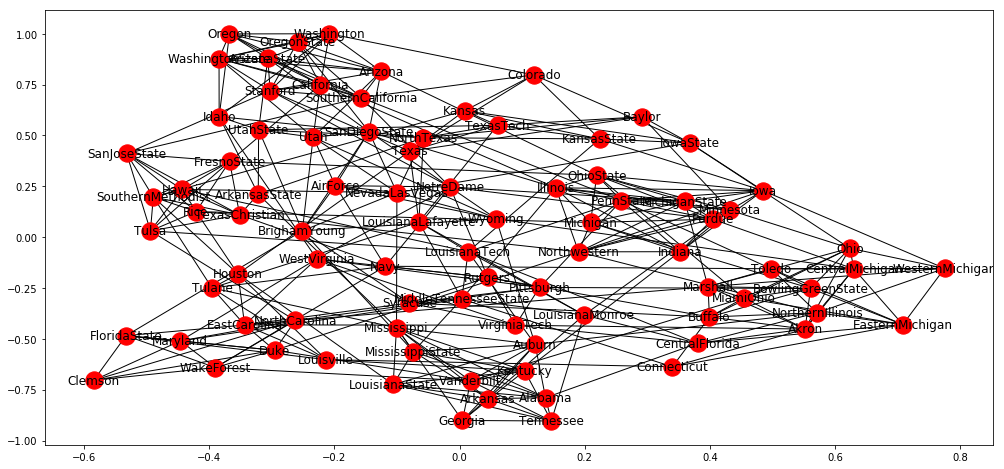

In [287]:
plt.figure(figsize=(17,8))
nx.draw_networkx(H)

[Short video](https://youtu.be/-v3nff8xlQ8)